# **Lab -7: Clustering**

In [ ]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [ ]:
import tarfile
import urllib
import pandas as pd
import urllib.request

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/BenCoke12/DMMLG3/main/Breast_Cancer.csv")

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
enc.fit(data[["Race", "Marital Status", "T Stage ", "N Stage", "6th Stage", "differentiate", "Grade", "A Stage", "Estrogen Status", "Progesterone Status", "Status"]])
data[["Race", "Marital Status", "T Stage ", "N Stage", "6th Stage", "differentiate", "Grade", "A Stage", "Estrogen Status", "Progesterone Status", "Status"]] = enc.transform(data[["Race", "Marital Status", "T Stage ", "N Stage", "6th Stage", "differentiate", "Grade", "A Stage", "Estrogen Status", "Progesterone Status", "Status"]])

X = data

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X)

In [ ]:
y_pred is kmeans.labels_

True

In [ ]:
kmeans.cluster_centers_

array([[5.43248974e+01, 1.76744186e+00, 1.35772914e+00, 5.38987688e-01,
        3.51573187e-01, 1.06019152e+00, 7.00410397e-01, 2.09849521e+00,
        9.84952120e-01, 2.22216142e+01, 9.63064295e-01, 8.67989056e-01,
        1.40000000e+01, 3.54787962e+00, 6.03146375e+01, 1.26538988e-01],
       [5.21666667e+01, 1.77083333e+00, 1.45833333e+00, 2.11111111e+00,
        8.50694444e-01, 2.61111111e+00, 6.63194444e-01, 2.24652778e+00,
        9.20138889e-01, 8.23784722e+01, 8.92361111e-01, 7.70833333e-01,
        1.58020833e+01, 6.94444444e+00, 5.77569444e+01, 3.09027778e-01],
       [5.30361905e+01, 1.79809524e+00, 1.35809524e+00, 1.57333333e+00,
        6.45714286e-01, 2.13523810e+00, 6.45714286e-01, 2.18095238e+00,
        9.61904762e-01, 5.30419048e+01, 9.42857143e-01, 8.07619048e-01,
        1.55295238e+01, 5.29142857e+00, 8.57638095e+01, 6.09523810e-02],
       [5.42795164e+01, 1.79160740e+00, 1.34779516e+00, 4.48079659e-01,
        2.88051209e-01, 8.86913229e-01, 7.05547653e-01, 2.082

In [ ]:
kmeans.labels_

array([0, 0, 2, ..., 0, 2, 3], dtype=int32)

In [ ]:
kmeans.transform(X)

array([[25.06559413, 80.71283049, 58.23594757, 39.23772304, 47.77130817],
       [13.75407466, 47.71797826, 30.05009894, 33.4826983 , 37.74792   ],
       [43.81651848, 26.76255997, 15.89953185, 46.67988246, 59.72967711],
       ...,
       [16.54044541, 63.77541894, 38.69911859, 26.57125028, 47.60805033],
       [25.41035611, 42.17438868, 18.50345833, 31.52634503, 49.70359885],
       [41.9188293 , 68.36238126, 29.48544223, 17.12347565, 76.30057133]])

In [ ]:
kmeans_iter1 = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="full", max_iter=1, random_state=1)
kmeans_iter2 = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="full", max_iter=2, random_state=1)
kmeans_iter3 = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="full", max_iter=3, random_state=1)
kmeans_iter1.fit(X)
kmeans_iter2.fit(X)
kmeans_iter3.fit(X)

KMeans(algorithm='full', init='random', max_iter=3, n_clusters=5, n_init=1,
       random_state=1)

In [ ]:
kmeans.inertia_

1656101.7514009434

In [ ]:
kmeans.score(X)

-1656101.7514009434

In [ ]:
kmeans_rnd_init1 = KMeans(n_clusters=5, init="random", n_init=1,
                         algorithm="full", random_state=44)
kmeans_rnd_init2 = KMeans(n_clusters=5, init="random", n_init=1,
                         algorithm="full", random_state=64)
kmeans_rnd_init1.fit(X)
kmeans_rnd_init2.fit(X)
kmeans_rnd_init1.inertia_

1656158.9768403233

In [ ]:
kmeans_rnd_init2.inertia_

1722847.0216311016

In [ ]:
kmeans_rnd_10_inits = KMeans(n_clusters=5, init="random", n_init=10,
                              algorithm="full", random_state=11)
kmeans_rnd_10_inits.fit(X)

KMeans(algorithm='full', init='random', n_clusters=5, random_state=11)

In [ ]:
kmeans_k3 = KMeans(n_clusters=3, random_state=42)
kmeans_k8 = KMeans(n_clusters=8, random_state=42)

kmeans_k3.fit(X)
kmeans_k8.fit(X)

KMeans(random_state=42)

In [ ]:
kmeans_k3.inertia_

2220492.63049596

In [ ]:
kmeans_k8.inertia_

1302389.3789534355

In [ ]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

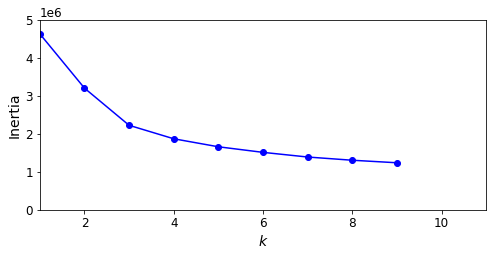

In [ ]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.axis([1, 11, 0, 5000000])
plt.show()

# **Finding number of optimal of clusters:-Elbow score**

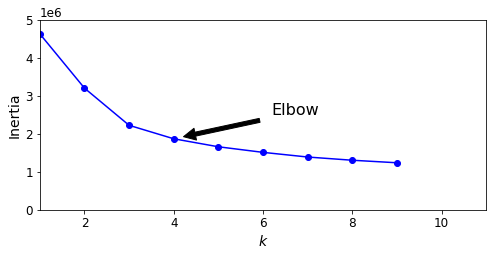

In [30]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
             xy=(4, inertias[3]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.axis([1, 11, 0, 5000000])
plt.show()

**elbow at k=4**

# **Silhouette score**

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
silhouette_score(X, kmeans.labels_) #computes the overall silhouette score 

0.2895683440481837

In [ ]:
silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k[1:]]     # compute silhouette scores for different k

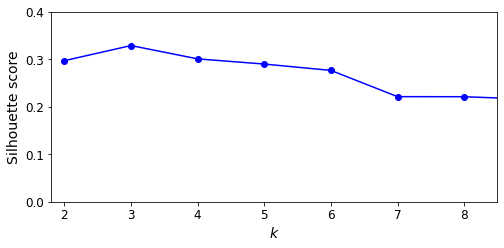

In [ ]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.axis([1.8, 8.5, 0, 0.4])
#save_fig("silhouette_score_vs_k_plot")
plt.show()

**k=5 is a good choice**

**Selecting number of clusters using silhouette plots**

For n_clusters = 2 The average silhouette_score is : 0.2967176963630493
For n_clusters = 3 The average silhouette_score is : 0.3284595317752115
For n_clusters = 4 The average silhouette_score is : 0.30049141217327
For n_clusters = 5 The average silhouette_score is : 0.2898211676454628
For n_clusters = 6 The average silhouette_score is : 0.27911196987433196


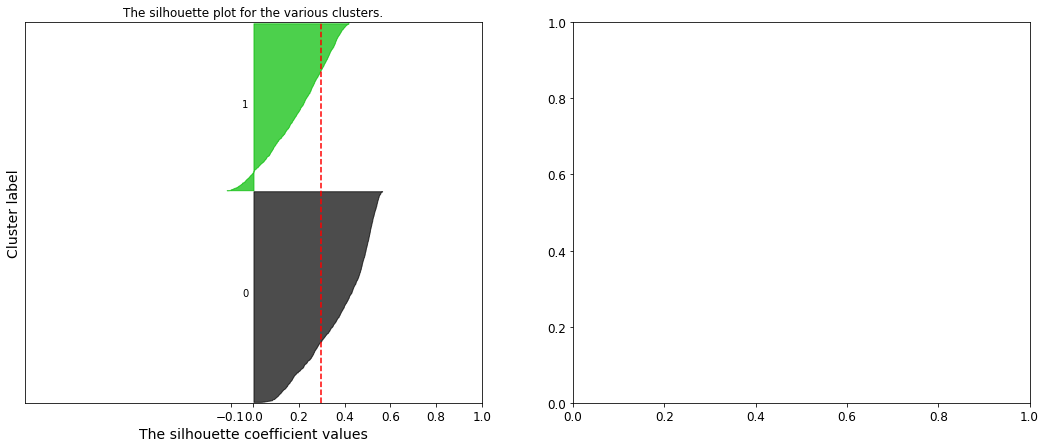

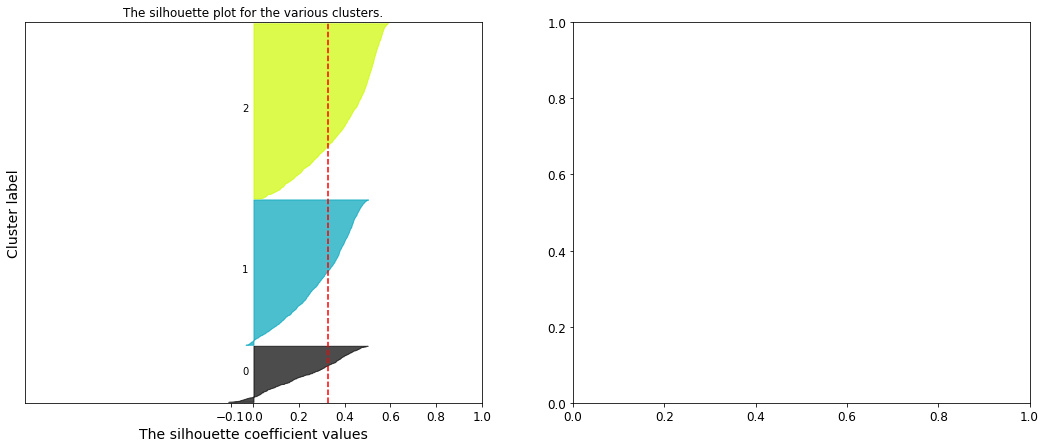

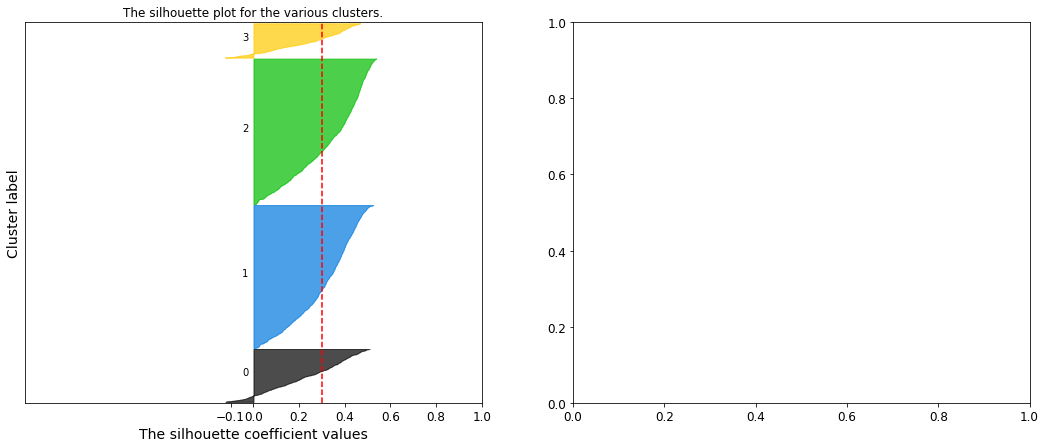

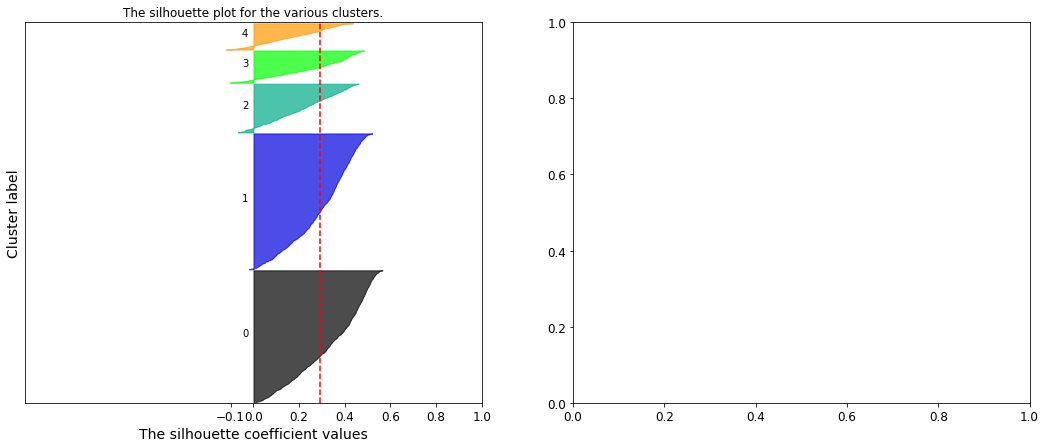

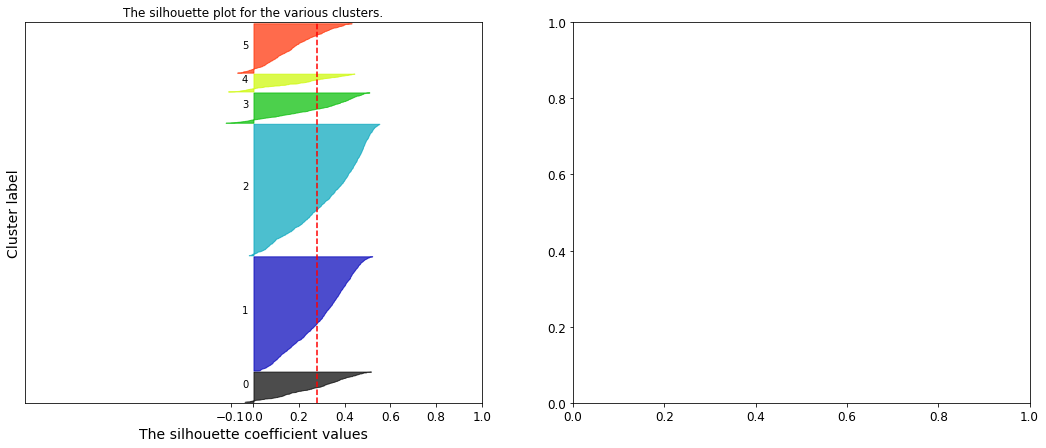

In [36]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    

  

plt.show()

#Gaussian Mixture Methods

In [ ]:
from sklearn.mixture import GaussianMixture as GMM

In [ ]:
gmm = GMM(n_components = 4, covariance_type = 'full').fit(X)

In [ ]:
labels = gmm.predict(X)

In [ ]:
probs = gmm.predict_proba(X)

In [ ]:
y_pred = gmm.fit_predict(X)

In [ ]:
gmm.score(X)

-7.0566378806253764

In [ ]:
gmm.aic(X)

58013.82166327303

In [ ]:
gmm.bic(X)

61863.141039170354

In [ ]:
gmms_per_k = [GMM(n_components=k, covariance_type = 'full', random_state=42).fit(X)
                for k in range(1, 20)]
scores = [model.score(X) for model in gmms_per_k]

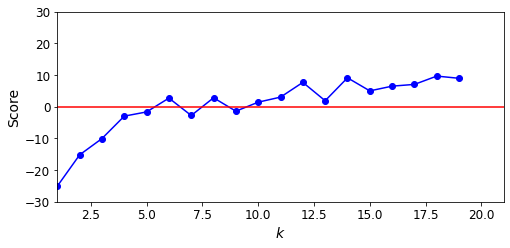

In [ ]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 20), scores, "bo-")
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Score", fontsize=14)
plt.axis([1, 21, -30, 30])
plt.show()

In [ ]:
aics = [model.aic(X) for model in gmms_per_k]

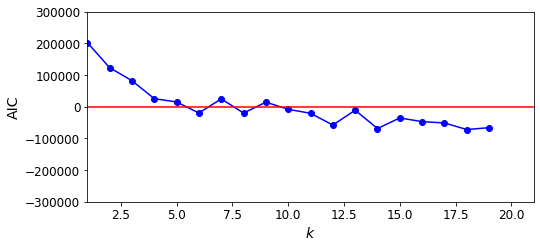

In [ ]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 20), aics, "bo-")
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel("$k$", fontsize=14)
plt.ylabel("AIC", fontsize=14)
plt.axis([1, 21, -300000, 300000])
plt.show()

In [ ]:
bics = [model.bic(X) for model in gmms_per_k]

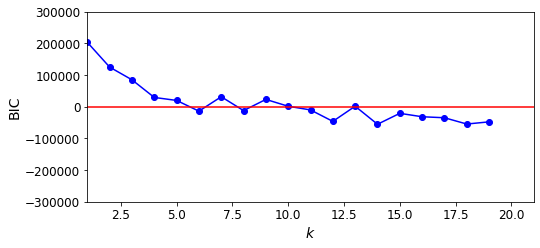

In [ ]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 20), bics, "bo-")
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel("$k$", fontsize=14)
plt.ylabel("BIC", fontsize=14)
plt.axis([1, 21, -300000, 300000])
plt.show()

In [ ]:
gmm_k13 = GMM(n_components = 13, covariance_type = 'full', random_state=42).fit(X)

In [ ]:
gmm_k13.bic(X)

1426.3349069777287